---
tips ... レストランスタッフが受け取ったチップの金額と、関連するデータを集めたもの

In [1]:
import statsmodels.api as sm
import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# tipsデータセットを読み込み
tips_dataset = sns.load_dataset('tips')

tips_dataset['tip'] = tips_dataset['tip'].apply(np.log)
tips_dataset['total_bill'] = tips_dataset['total_bill'].apply(np.log)

# データセットから30件をランダムサンプリング
sample_df = tips_dataset.sample(frac=1)[:30]
sample_df.head(10)

total_bill       tip     sex smoker   day    time  size
118    2.520113  0.587787  Female     No  Thur   Lunch     2
197    3.763755  1.609438  Female    Yes  Thur   Lunch     4
230    3.178470  0.693147    Male    Yes   Sat  Dinner     4
17     2.790551  1.311032    Male     No   Sun  Dinner     3
111    1.981001  0.000000  Female     No   Sat  Dinner     1
18     2.831447  1.252763  Female     No   Sun  Dinner     3
221    2.596746  1.247032  Female    Yes   Fri   Lunch     2
152    2.848392  1.007958    Male     No   Sun  Dinner     3
108    2.903617  1.324419    Male     No   Sat  Dinner     2
98     3.044999  1.098612    Male    Yes   Fri  Dinner     2

---
散布図

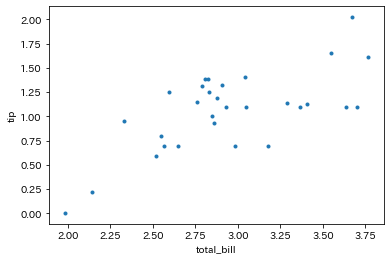

In [2]:
# プロット
fig, ax = plt.subplots()
ax.scatter(sample_df['total_bill'], sample_df['tip'], marker='.')
ax.set_xlabel('total_bill')
ax.set_ylabel('tip')
plt.show()

---
単回帰

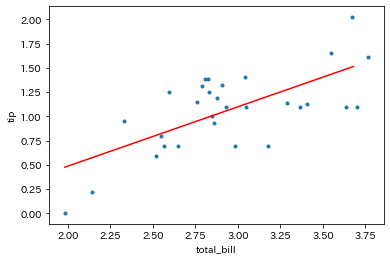

In [3]:
# 単回帰モデル生成
x = sm.add_constant(sample_df['total_bill'])
y = sample_df['tip']
model = sm.OLS(y, x).fit()

# 回帰直線をプロットするための予測処理
test_range = np.arange(x['total_bill'].min(), x['total_bill'].max(), 0.1)
pred_y = model.predict(sm.add_constant(test_range))

# プロット
fig, ax = plt.subplots()
ax.scatter(sample_df['total_bill'], sample_df['tip'], marker='.')
ax.plot(test_range, pred_y, color='r')
ax.set_xlabel('total_bill')
ax.set_ylabel('tip')
plt.show()

---
95%信頼区間

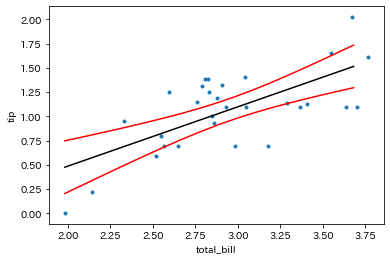

In [4]:
summary = model.get_prediction(sm.add_constant(test_range)).summary_frame(alpha=0.05)

# プロット
fig, ax = plt.subplots()
ax.scatter(sample_df['total_bill'], sample_df['tip'], marker='.')
ax.plot(test_range, pred_y, color='black')
ax.plot(test_range, summary['mean_ci_lower'], color='r')
ax.plot(test_range, summary['mean_ci_upper'], color='r')
ax.set_xlabel('total_bill')
ax.set_ylabel('tip')
plt.show()

---
95%予測区間

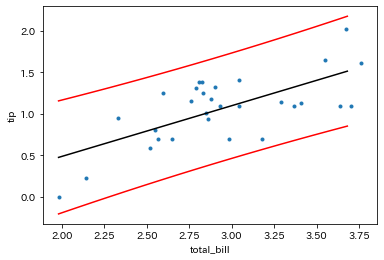

In [5]:
# プロット
fig, ax = plt.subplots()
ax.scatter(sample_df['total_bill'], sample_df['tip'], marker='.')
ax.plot(test_range, pred_y, color='black')
ax.plot(test_range, summary['obs_ci_lower'], color='r')
ax.plot(test_range, summary['obs_ci_upper'], color='r')
ax.set_xlabel('total_bill')
ax.set_ylabel('tip')
plt.show()

In [6]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     24.03
Date:                Fri, 30 Aug 2019   Prob (F-statistic):           3.62e-05
Time:                        16:57:53   Log-Likelihood:                -5.9127
No. Observations:                  30   AIC:                             15.83
Df Residuals:                      28   BIC:                             18.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7364      0.372     -1.981      0.0